In [39]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import matplotlib.pyplot as plt 

import cv2
from PIL import Image
import random

import json

import SimpleITK as sitk
from torchio.transforms import Affine
from torchio import Image

from pathlib import Path

In [37]:
#path = Path('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\')
path = Path("/mnt/LSDF/tomo/ershov/medaka/workshop_landmarks/")
output_path = 'reference'

sample = '849'

In [5]:
sitk_image = sitk.ReadImage(path / 'data' / f'{sample}.tif')

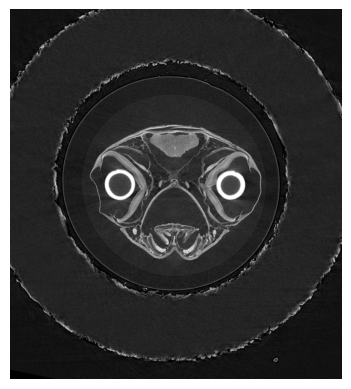

In [17]:
plt.imshow(sitk.GetArrayViewFromImage(sitk_image)[400], cmap= 'gray')
plt.axis('off');

In [42]:
#np.arange(-10, 11, 1)

samples_list = []

for i in range(1):
    
    rot = random.randint(-10,10)

    sample_id = random.randint(1500, 1600)

    z = random.randint(0,130)
    #z_end = random.randint(0,130)

    x = random.randint(0,30)
    y = random.randint(0,30)

    samples_list.append(sample_id)

    info = {'rot_z': rot, 'x': x, 'y': y, 'z': z}

    with open(path / output_path / (str(sample_id) + '_info.txt'), "w") as fp:
            json.dump(info, fp)

    print('Info:', sample_id, rot, x, y, z)
    
    # Rotate
    img_rotation = Affine(scales=[1.0, 1.0, 1.0], degrees=[0,0,rot], translation=[0,0,0],
                                  center='image')

    image_data = sitk.GetArrayFromImage(sitk_image).astype('uint8')
    #image_data = sitk.GetArrayFromImage(sitk_im<age).transpose(2, 1, 0).astype('uint8')
    print('Image shape before', image_data.shape)

    image_rotated = img_rotation(np.expand_dims(image_data, axis=0))[0]

    image_rotated = image_rotated[z:,y:,x:]

    print('Image shape after', image_rotated.shape)
    print(image_rotated.dtype)
    
    sitk_res_image = sitk.GetImageFromArray(image_rotated.astype('uint8'))
    sitk.WriteImage(sitk_res_image, path / output_path / f'{sample_id}.tif')

    

Info: 1546 -4 24 2 41
Image shape before (2253, 867, 777)


MemoryError: Unable to allocate 5.65 GiB for an array with shape (777, 867, 2253) and data type float32

Image shape (2253, 867, 777)
Image shape (2253, 867, 777)
float32


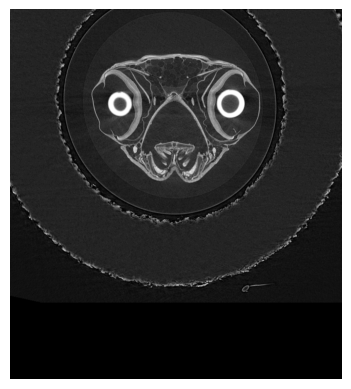

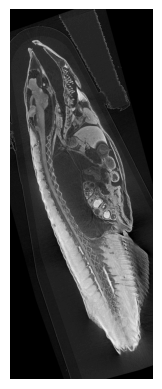

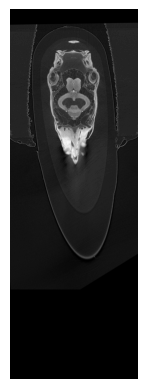

In [19]:
plt.imshow(image_rotated[400], cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image_rotated[:,:,400], cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image_rotated[:,140,:], cmap='gray')
plt.axis('off')
plt.show()